# Welcome to the Notebook

# Task 1 :

## Installing pyspark module

In [6]:
!pip install pyspark

  Running setup.py bdist_wheel for pyspark: started
  Running setup.py bdist_wheel for pyspark: still running...
  Running setup.py bdist_wheel for pyspark: finished with status 'done'
  Stored in directory: C:\Users\tml\AppData\Local\pip\Cache\wheels\9e\c1\93\d40ec851fc2b278e1056c1353ff95a7a4ef1b219f74ca9c11f
Successfully built pyspark


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.28 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 22.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Importing the modules

In [28]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max ,struct

import matplotlib.pyplot as plts

# creating spark session

In [2]:
spark = SparkSession.builder.getOrCreate()

# Task 2 :

## importing the Listenings.csv file:

In [4]:
listening_df=spark.read.format('csv').option('inforschema',True).option('header',True).load('Listenings.csv')

## let's check the data:

In [8]:
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

## let's delete useless columns:

In [8]:
listening_df = listening_df.drop('date')

## drop the null rows:

In [14]:
listening_df= listening_df.na.drop()

## let's check the dataset again:

In [10]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

## let's see the schema:

In [12]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



## let's see the shape of our dataframe:

In [15]:
shape=(listening_df.count(),len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

## Query #0: select two columns: track and artist

In [5]:
q0=listening_df.select('track','artist')
q0.show()

+--------------------+---------------+
|               track|         artist|
+--------------------+---------------+
|           Price Tag|       Jessie J|
|Price Tag (Acoust...|       Jessie J|
|Be Mine! (Ballad ...|          Robyn|
|            Acapella|          Kelis|
|   I'm Not Invisible|      The Tease|
|Bounce (Feat NORE...|       MSTRKRFT|
|Don't Stop The Mu...|        Rihanna|
|               ObZen|      Meshuggah|
|   Yama's Messengers|         Gojira|
|On the Brink of E...|   Napalm Death|
|On the Brink of E...|   Napalm Death|
|        In Deference|   Napalm Death|
|      Post(?)organic|    Decapitated|
|        Mind Feeders|   Dom & Roland|
|Necrosadistic War...|Cannibal Corpse|
|     Dance All Night|   Dom & Roland|
|          Late Night|   Dom & Roland|
|          Freak Seen|   Dom & Roland|
|Paradrenasite (Hi...|   Dom & Roland|
|               Rhino|   Dom & Roland|
+--------------------+---------------+
only showing top 20 rows



## Query #1:
Let's find all of the records of those users who have listened to Rihanna

In [9]:
q1=listening_df.select('*').filter(listening_df.artist=="Rihanna").show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|Rihanna - We All ...|Rihanna|                null|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihann

## Query #2:
Let's find top 10 users who are fan of Rihanna

In [10]:
q2=listening_df.select('user_id').filter(listening_df.artist=='Rihanna').groupBy('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



## Query #3:
find top 10 famous tracks

In [11]:
q3=listening_df.select('artist','track').groupBy('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q3.show()

+--------------------+-----------------+-----+
|              artist|            track|count|
+--------------------+-----------------+-----+
|       Justin Bieber|            Sorry| 3492|
|      Arctic Monkeys| Do I Wanna Know?| 2986|
|            Bon Iver|      Skinny Love| 2933|
|         The Killers|    Mr Brightside| 2844|
|                Zayn|       PILLOWTALK| 2772|
|            Bastille|          Pompeii| 2752|
|      Mumford & Sons|  Little Lion Man| 2725|
|             Rihanna|             Work| 2691|
|      Mumford & Sons|         The Cave| 2653|
|Florence + the Ma...|Dog Days Are Over| 2606|
+--------------------+-----------------+-----+



## Query #4:
find top 10 famous tracks of Rihanna

In [12]:
q4=listening_df.select('artist','track').filter(listening_df.artist=='Rihanna').groupBy('artist','track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2691|
|Rihanna|Only Girl (In the...| 1829|
|Rihanna|We Found Love (fe...| 1754|
|Rihanna|            Rude Boy| 1390|
|Rihanna|                 S&M| 1368|
|Rihanna|            Diamonds| 1314|
|Rihanna|      Kiss it Better|  953|
|Rihanna| Where Have You Been|  899|
|Rihanna|Cheers (Drink to ...|  715|
|Rihanna|           Disturbia|  691|
+-------+--------------------+-----+



## Query #5:
find top 10 famous albums

In [13]:
q5=listening_df.select('artist','album').groupBy('artist','album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :

## importing the genre.csv file:

In [14]:
genre_df=spark.read.format('csv').option('inforschema',True).option('header',True).load('genre.csv')

## let's check the data

In [15]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



## Let's inner join these two data frames

In [19]:
 jin=listening_df.join(genre_df, listening_df.artist == genre_df.artist, 'inner')

## Query #6
find top 10 users who are fan of pop music

In [20]:
q6=jin.select('user_id').filter(jin.genre=='pop').groupBy('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|    musicboy80s|  384|
|   BlueKnockOut|  378|
|  incultojurgis|  374|
| ElektricOrchid|  371|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|        DP_Sage|  320|
+---------------+-----+



## Query #7
find top 10 famous genres

In [21]:
q7=jin.select('genre').groupBy('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2811365|
|       pop|1653729|
|electronic| 590315|
|   hip hop| 568489|
|      folk| 460192|
|indie rock| 450651|
|      punk| 397175|
|       r&b| 370578|
|     indie| 220224|
|     metal| 217371|
+----------+-------+



# Task 5:

## Query #8
find out each user favourite genre

In [22]:
q8=jin.select('user_id','genre').groupBy('user_id','genre').agg(count('*').alias('couunt')).orderBy('user_id')
q8.show()

+-------+--------------------+------+
|user_id|               genre|couunt|
+-------+--------------------+------+
| --Seph|               indie|     3|
| --Seph|  progressive trance|     1|
| --Seph|               Ruben|     4|
| --Seph| Boston Pops Orch...|     1|
| --Seph|          Nils Frahm|     1|
| --Seph|          electropop|     1|
| --Seph|   Alesso Feat Hurts|     1|
| --Seph|                folk|    10|
| --Seph|               dance|     1|
| --Seph| The Ambrosian Si...|     1|
| --Seph|     Jennifer Vyvyan|     1|
| --Seph|          Thom Yorke|     2|
| --Seph|           indie pop|     1|
| --Seph|   progressive house|     1|
| --Seph| Tamás Vásáry & Y...|     1|
| --Seph|                soul|     1|
| --Seph|               house|     3|
| --Seph| Sir Colin Davis ...|     1|
| --Seph|           classical|    32|
| --Seph|               metal|     1|
+-------+--------------------+------+
only showing top 20 rows



In [23]:
q82=q8.groupBy('user_id').agg(max(struct(col('couunt'),col('genre'))).alias('max')).select(col('user_id'),col('max.genre'))
q82.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|      AceFaceUK|             rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
+---------------+-----------------+
only showing top 20 rows



## Query #9

In [24]:
q9=genre_df.select('genre').filter((col('genre')=='pop')|(col('genre')=='rock')| (col('genre')=='metal')| (col('genre')=='hip hop')).groupBy('genre').agg(count('genre').alias('count'))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



## Now, let's visualize the results using matplotlib

In [29]:
q9_list=q9.collect()

In [30]:
lables=[row['genre'] for row in q9_list]
counts=[row['count'] for row in q9_list]

In [31]:
print(lables)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


## now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

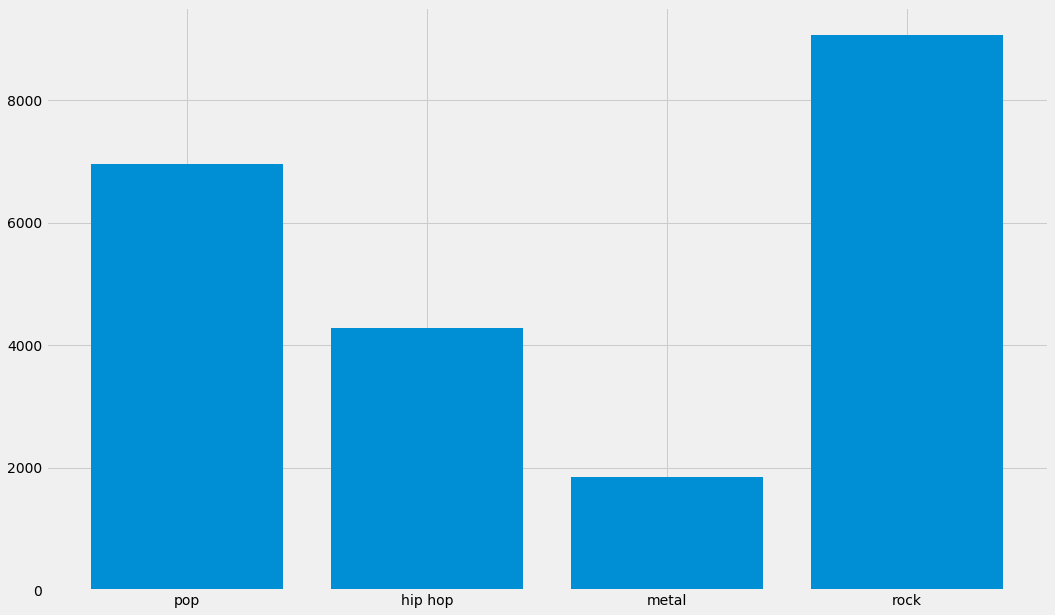

In [32]:
plts.bar(lables,counts)

# Done !!

## Here we clean the data and handle misssing values with the mean value of that particular column and fill wih it. now this data is further Analysis.

### Author : Satish Bamroliya